### dfs
- 결론
    - DFS - 스택 사용
    - BFS - 큐 사용
    - 재귀호출 포함
    - 리스트만 가지고 구현해도 됨(헷갈리고, 오류가 날 수 있음, 코드양이 길어짐)

#### DFS 이전에
- Stack - Last-in First-out(LIFO)
- Queue - First-in-First-out(FIFO)

In [2]:
## 스택
stack = [] ## 일반적인 리스트로 구현 가능

## 5입력, 2입력, 3입력, 7입력 꺼내기, 1입력, 4입력, 꺼내기, 꺼내기
stack.append(5)
stack.append(2)
stack.append(3)
stack.append(7)
stack

[5, 2, 3, 7]

In [3]:
## 원래 스택 push(append), pop
stack.pop()

7

In [4]:
stack

[5, 2, 3]

In [5]:
stack.append(1)
stack.append(4)
stack

[5, 2, 3, 1, 4]

In [6]:
val = stack.pop()
val

4

In [7]:
stack

[5, 2, 3, 1]

In [8]:
val2 =stack.pop()
stack

[5, 2, 3]

In [9]:
val + val2

5

In [11]:
## 큐, 모듈에서 deque를 사용. deque로 큐처럼 사용가능
## enqueue(마지막에 삽입 append), dequeue(처음에서 뽑아내기 popleft)
## deque 구조에서 appendLeft, pop을 사용하지 않으면 queue하고 동일하게 동작
from collections import deque

queue = deque()

In [12]:
queue.append(5)
queue.append(2)
queue.append(3)
queue.append(7)
queue

deque([5, 2, 3, 7])

In [13]:
queue.popleft()

5

In [14]:
queue.append(1)
queue.append(4)
queue.popleft()

2

In [15]:
queue

deque([3, 7, 1, 4])

- 스택하고 큐는 pip로 다른 모듈을 설치해도 되지만
- 코딩테스트에서는 pip를 허용하지 않으므로 deque를 쓰세요

In [16]:
## deque에서 list로 형변환
list(queue)

[3, 7, 1, 4]

#### 재귀호출
- 꽤 어렵다. 잘 생각해보면 그렇게 어렵지도 않음
- 디버깅이 힘들기때문에 어렵다고 생각됨
- 재귀호출을 사용하지 않으면 소스코드가 많이 길어질 수 있음
- 수학적인 지식이 많이 들어가는 함수

In [ ]:
## 무한 루프마냥 무한히 재귀호출
## 예외발생한다
## 다른언어는 컴퓨터 메모리가 받쳐줄때까지 무한대로 재귀!
## 프렉탈 구조(시에르핀스키 삼각형 등)를 그리거나 할때 재귀호출 사용
def rec_call():
    print('재귀호출')
    rec_call()

rec_call()

In [17]:
## 일반적인 방식(반복)으로 팩토리얼 구하기
def factorial_iter(n):
    result = 1
    # 1부터 n까지의 수를 곱하기
    for i in range(1, n+1):
        result *= i

    return result ## 팩토리얼이기 때문에 짧음.

In [18]:
## 재귀호출로 팩토리얼 구하기
def factorial_rec(n):
    if n <= 1:
        return 1
    
    # n! = n(n-1)!로 구하기
    return n * factorial_rec(n - 1)

In [20]:
factorial_iter(5)

120

In [22]:
factorial_rec(5)

120

- 점화식 - 수학으로 풀수있는 함수 등을 사용해서 구하는 방정식
    - 점화식을 잘 만들 수 있으면 코딩테스트를 쉽게 해결할 수 있음

### DFS
- Depth First Search - 깊이 우선 탐색
    - 그래프에서 깊은 부분을 우선적으로 탐색하는 알고리즘

- 노드와 엣지 간의 관계를 표현하는 방식
    - 인접행렬
    - 인접리스트
    - $O(n)$

In [25]:
## 인접행렬(매트릭스 형태)
INF = 9999999999 # 무한대 뜻

graph = [ # 인접리스트
    [0, 7, 5],
    [7, 0, INF],
    [5, INF, 0]
]

graph

[[0, 7, 5], [7, 0, 9999999999], [5, 9999999999, 0]]

- 무방향 그래프에서는 사선으로 0값이 연결됨

In [27]:
## 인접리스트(리스트 형태)
graph2 = [[] for _ in range(3)] # 노드가 3개니까

## 노드0에서 가는 길 입력
graph2[0].append((1, 7)) ## 1번 노드로 갈때 비용 7
graph2[0].append((2, 5)) ## 2번 노드로 갈때 비용 5

## 노드1에서 갈 수 있는 길 입력
graph2[1].append((0, 7))

## 노드2에서 갈 수 있는 길
graph2[2].append((0, 5))

graph2

[[(1, 7), (2, 5)], [(0, 7)], [(0, 5)]]

- 인접행렬
    - 무방향일때 효율적

- 인접리스트
    - 방향성 있을때 효율적
    - 메모리 효율적

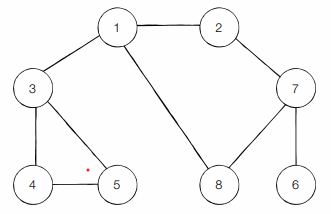

테스트 코드 예제 그래프

In [29]:
## 인접리스트로 그래프값을 구성
dfs_graph = [
    [], ## 0번이 없기 때문에 비워둠
    [2, 3, 8], # 1번 노드에서는 2,3,8번 노드로 갈 수 있음
    [1, 7], # 2번 노드에서는 ...
    [1, 4, 5], #3
    [3, 5], # 4
    [3, 4], # 5
    [7], # 6
    [2, 6, 8], # 7
    [1, 7] # 8
]

# 각 노드의 방문정보를 1차원 리스트로 생성
visited = [False] * 9
dfs_graph

[[], [2, 3, 8], [1, 7], [1, 4, 5], [3, 5], [3, 4], [7], [2, 6, 8], [1, 7]]

In [30]:
## DFS 함수
def dfs(graph, node, visited):
    # 현재 노드를 방문처리
    visited[node] = True
    print(node, end=' ') # 재귀함수기 때문에 마지막 호출된 재귀함수의 값이 출력
    for i in graph[node]:
        if not visited[i]:
            ## 재귀호출!
            dfs(graph=graph, node = i, visited=visited)

In [31]:
dfs(dfs_graph, 1, visited)

1 2 7 6 8 3 4 5 

### BFS

- Breadth First Search - 넓이 우선 탐색
    - 가까운 노드부터 탐색하는 알고리즘
    - 큐를 사용해서 구현
    - $O(N)$ 복잡도, DFS보다 더 빠르다
- 재귀호출은 컴퓨터 수행시간이 빠르지 않음. 느려지는 경우도 발생

In [33]:
bfs_graph = [
    [], ## 0번이 없기 때문에 비워둠
    [2, 3, 8], # 1번 노드에서는 2,3,8번 노드로 갈 수 있음
    [1, 7], # 2번 노드에서는 ...
    [1, 4, 5], #3
    [3, 5], # 4
    [3, 4], # 5
    [7], # 6
    [2, 6, 8], # 7
    [1, 7] # 8
]

# 각 노드의 방문정보를 1차원 리스트로 생성
bfs_visited = [False] * 9
bfs_graph

[[], [2, 3, 8], [1, 7], [1, 4, 5], [3, 5], [3, 4], [7], [2, 6, 8], [1, 7]]

In [34]:
def bfs(graph, start, visited):
    ## 큐 대신 deque
    queue = deque([start])
    # 현재노드 방문처리
    visited[start] = True
    # 큐가 빌때까지 반복
    while queue:
        # 큐에서 하나의 노드를 뽑음
        node = queue.popleft()
        print(node, end=' ')
        # 해당 노드가 연결된 아직 방문안한 노드들을 큐에 삽입
        for i in graph[node]:
            if not visited[i]:
                queue.append(i)
                visited[i] = True

In [35]:
bfs(bfs_graph, 1, bfs_visited)